<a href="https://colab.research.google.com/github/MetalHeadv3/Machine-Learning/blob/main/ML_walidacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np





In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [5]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8173 - loss: 0.5754 - val_accuracy: 0.9799 - val_loss: 0.0683
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9703 - loss: 0.1002 - val_accuracy: 0.9861 - val_loss: 0.0505
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9789 - loss: 0.0710 - val_accuracy: 0.9877 - val_loss: 0.0415
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9833 - loss: 0.0544 - val_accuracy: 0.9880 - val_loss: 0.0396
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.9879 - loss: 0.0410 - val_accuracy: 0.9893 - val_loss: 0.0359
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9890 - loss: 0.0377 - val_accuracy: 0.9901 - val_loss: 0.0370
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9903 - loss: 0.0300 - val_accuracy: 0.9899 - val_loss: 0.0402
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9927 - loss: 0.0234 - 

In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

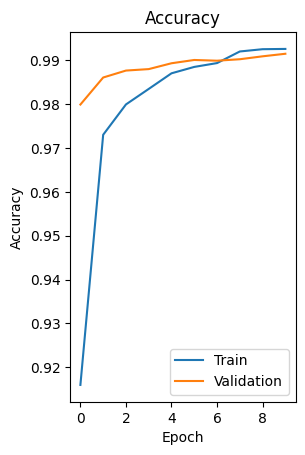

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

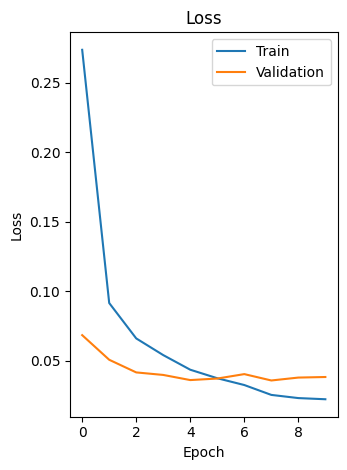

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9909 - loss: 0.0305

Test accuracy: 0.9921
Test loss: 0.0255


In [14]:
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMacierz pomyłek:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Macierz pomyłek:
[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1129    2    0    0    0    1    2    1    0]
 [   2    0 1024    1    1    0    0    4    0    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  978    0    2    0    1    1]
 [   0    0    0    6    0  884    1    1    0    0]
 [   2    2    0    0    4    2  948    0    0    0]
 [   0    1    2    1    0    0    0 1022    0    2]
 [   2    0    2    1    0    2    0    3  962    2]
 [   0    0    0    0    6    4    0    3    3  993]]
